In [ ]:
import polars as pl
import numpy as np
import re

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scripts import style
style.mpl_apply()

# Merge

In [2]:
path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
# pair_ohe = pl.read_parquet(path + "pair_ohe_full.parquet")

In [5]:
merge = pl.read_parquet(path + "merge_clean_df.parquet")

In [10]:
merge

REPORT_ID,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_CODE,OUTCOME_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSAGEFORM_ENG,PT_NAME_ENG,SOC_NAME_ENG,INDICATION_NAME_ENG,ACTIVE_INGREDIENT_NAME,AGE_Y,WEIGHT_KG,HEIGHT_CM,hours_between_medicament
i64,i64,date,date,str,str,str,str,i8,i8,i8,i8,i8,i8,str,str,str,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Infection""","""Infections and infestations""","""Infection""","""cefazolin""",57.0,93.2,null,null
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Rash""","""Skin and subcutaneous tissue d…","""Infection""","""cefazolin""",57.0,93.2,null,null
305014,305014,2008-04-21,2008-04-21,"""Spontaneous""","""M""","""Unknown""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Suspect""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Cyanosis""","""Vascular disorders""","""Infection""","""cefazolin""",57.0,93.2,null,null
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime""",3.0,null,null,24.0
303952,303952,2008-05-22,2008-05-22,"""Published""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME FOR INJECTION USP""","""Suspect""","""Intravenous (not otherwise spe…",150.0,"""mg/kg""","""POWDER FOR SOLUTION INTRAMUSCU…","""Pneumonia necrotising""","""Infections and infestations""","""Infection""","""cefuroxime salt not specified""",3.0,null,null,24.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Drug hypersensitivity""","""Immune system disorders""","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Chest pain""","""General disorders and administ…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0
907353481,null,2025-06-23,2024-06-18,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL""","""Concomitant""","""Unknown""",500.0,"""Milligram""","""NOT SPECIFIED""","""Asthma""","""Respiratory, thoracic and medi…","""Product used for unknown indic…","""cefadroxil""",65.0,34.0,null,12.0


# Dates

In [6]:
# seect REPORT_ID and DATRECEIVED
data = merge.select(["REPORT_ID", "DATRECEIVED"])
# keep only the first reprort_id if there are multiple
data = data.unique(subset=["REPORT_ID"])
data

REPORT_ID,DATRECEIVED
i64,date
905042496,2021-12-21
318802,2009-02-20
902267549,2018-12-05
699329,2017-06-07
900069338,2014-03-07
…,…
660895,2015-07-29
1051250,2023-06-02
1011140,2022-07-13


In [20]:
# get the distribution of DATERECEIVED by year, right now they are in YYYMMDD format
dates = data.select("DATRECEIVED").to_series().to_list()
years = [int(str(date)[:4]) for date in dates]
year_counts = np.unique(years, return_counts=True)
year_counts

(array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]),
 array([  2, 105, 107, 126,  88, 120, 165, 158, 139, 154, 233, 281, 599,
        549, 527, 582, 582, 614, 356]))

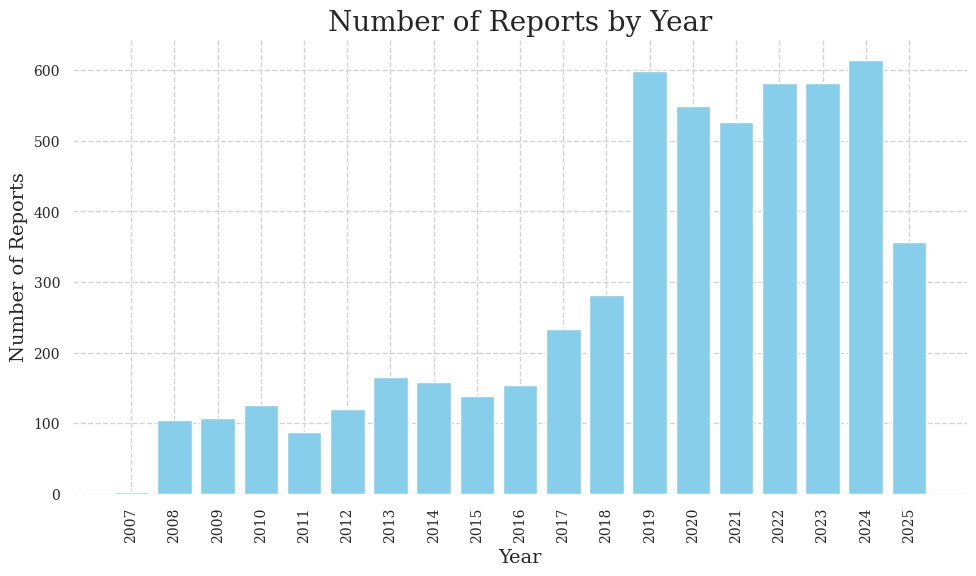

In [21]:
# plot the year counts
plt.figure(figsize=(10, 6))
plt.bar(year_counts[0], year_counts[1], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.xticks(year_counts[0], rotation=90)
plt.title("Number of Reports by Year")
plt.savefig('visualizations/canada/00_05.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

# Patients with AERs

In [ ]:
# import polars as pl




# path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
# merge = pl.read_parquet(path + "merge_clean_df.parquet")

# columns = [
#     "REPORT_ID", 
#     "GENDER_CODE",
#     "DISABILITY",
#     "CONGENITAL_ANOMALY",
#     "OTHER_MEDICALLY_IMP_COND",
#     "AGE_Y",
#     "WEIGHT_KG",
#     "HEIGHT_CM"]


# # keep the first one 
# patients = merge.unique(subset=["REPORT_ID"]).select(columns)
# patients = patients.sort("REPORT_ID")
# patients.write_parquet(path + "patients.parquet")
# patients

REPORT_ID,GENDER_CODE,DISABILITY,CONGENITAL_ANOMALY,OTHER_MEDICALLY_IMP_COND,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,str,i8,i8,i8,f64,f64,f64
903827391,"""F""",2,2,2,44.0,null,null
906601704,"""F""",2,2,2,52.0,null,null
902629596,"""F""",2,2,1,34.0,null,null
900069338,"""M""",2,2,2,56.0,74.0,176.0
405444,"""F""",null,null,null,73.0,91.0,null
…,…,…,…,…,…,…,…
950436,"""M""",2,2,2,80.0,67.0,168.0
1096606,"""M""",2,2,1,61.0,null,null
903457460,"""M""",2,2,2,55.0,null,null


In [ ]:
# import polars as pl




# path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
# merge = pl.read_parquet(path + "merge_clean_df.parquet")

# columns = [
#     "REPORT_ID", 
#     "GENDER_CODE",
#     "DISABILITY",
#     "CONGENITAL_ANOMALY",
#     "OTHER_MEDICALLY_IMP_COND",
#     "AGE_Y",
#     "WEIGHT_KG",
#     "HEIGHT_CM"]


# # keep the first one 
# patients = merge.unique(subset=["REPORT_ID"])
# patients = patients.sort("REPORT_ID")
# patients.write_parquet(path + "patients_full.parquet")
# patients

REPORT_ID,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_CODE,OUTCOME_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSAGEFORM_ENG,PT_NAME_ENG,SOC_NAME_ENG,INDICATION_NAME_ENG,ACTIVE_INGREDIENT_NAME,AGE_Y,WEIGHT_KG,HEIGHT_CM,hours_between_medicament
i64,i64,date,date,str,str,str,str,i8,i8,i8,i8,i8,i8,str,str,str,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64
142588,142588,2015-12-11,2001-09-18,"""Published""","""F""","""Recovered/resolved""","""Serious""",2,2,2,2,1,1,"""Other health professional""","""MAH""","""CEFAZOLIN""","""Concomitant""","""Unknown""",4.0,"""Gram""","""""","""Neuropathy peripheral""","""Nervous system disorders""","""Sepsis""","""cefazolin""",69.0,null,null,null
182749,182749,2011-06-27,2005-04-15,"""Study""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Pharmacist""","""MAH""","""CEFOTAXIME""","""Drug used to treat AE""","""Intravenous (not otherwise spe…",null,"""""","""Injection""","""Depressed level of consciousne…","""Nervous system disorders""","""Delusional disorder, unspecifi…","""cefotaxime""",86.0,null,null,null
195272,195272,2009-07-06,2005-12-27,"""Study""","""M""","""Unknown""","""Serious""",null,null,null,null,1,null,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Concomitant""","""Unknown""",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Haemoglobin decreased""","""Investigations""","""Renal transplant""","""cefazolin""",53.0,null,null,null
203481,203481,2009-06-26,2006-06-26,"""Spontaneous""","""M""","""Fatal""","""Serious""",1,1,null,1,1,1,"""Consumer/other non health prof…","""Community""","""CEFTIN - TAB 250MG""","""Concomitant""","""Unknown""",null,"""""","""Tablets""","""Blood pressure abnormal""","""Investigations""","""Blood pressure increased""","""cefuroxime""",61.0,72.574779,182.88,null
210335,210335,2009-03-18,2006-12-04,"""Published""","""M""","""Recovered/resolved""","""Serious""",null,null,null,null,null,1,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Concomitant""","""Intravenous (not otherwise spe…",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Agitation""","""Psychiatric disorders""","""Antibiotic prophylaxis""","""cefazolin""",28.0,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
908137781,null,2025-06-24,2025-06-24,"""Spontaneous""","""F""","""Unknown""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFUROXIME SODIUM""","""Concomitant""","""Unknown""",null,"""""","""""","""Off label use""","""Injury, poisoning and procedur…","""Product used for unknown indic…","""cefuroxime sodium""",41.0,null,null,null
908140366,null,2025-06-25,2025-06-25,"""Spontaneous""","""F""","""Not recovered/not resolved""","""Serious""",2,2,2,2,2,1,"""Other health professional""","""MAH""","""CEFADROXIL MONOHYDRATE""","""Concomitant""","""Unknown""",null,"""""","""""","""Oedema""","""General disorders and administ…","""Product used for unknown indic…","""cefadroxil monohydrate""",65.0,34.0,null,null
908142798,null,2025-06-25,2025-06-25,"""Spontaneous""","""M""","""Recovered/resolved""","""Serious""",2,2,2,2,1,2,"""Consumer/other non health prof…","""MAH""","""CEFUROXIME AXETIL""","""Suspect""","""Unknown""",null,"""""","""NOT SPECIFIED""","""Diarrhoea""","""Gastrointestinal disorders""","""Nasal polyps""","""cefuroxime axetil""",59.0,null,null,null


In [24]:
import polars as pl
path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
patients = pl.read_parquet(path + "patients.parquet")
patients.head(3)

REPORT_ID,GENDER_CODE,DISABILITY,CONGENITAL_ANOMALY,OTHER_MEDICALLY_IMP_COND,AGE_Y,WEIGHT_KG,HEIGHT_CM
i64,str,i8,i8,i8,f64,f64,f64
142588,"""F""",2,2,1,69.0,null,null
182749,"""F""",null,null,null,86.0,null,null
195272,"""M""",null,null,null,53.0,null,null


In [23]:
import polars as pl
path = "data/processed/Canada Vigilance Adverse Reaction Online Database/"
patients_full = pl.read_parquet(path + "patients_full.parquet")
patients_full.head(3)

REPORT_ID,REPORT_NO,DATRECEIVED,DATINTRECEIVED,REPORT_TYPE_ENG,GENDER_CODE,OUTCOME_ENG,SERIOUSNESS_ENG,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,REPORTER_TYPE_ENG,SOURCE_ENG,DRUGNAME,DRUGINVOLV_ENG,ROUTEADMIN_ENG,UNIT_DOSE_QTY,DOSE_UNIT_ENG,DOSAGEFORM_ENG,PT_NAME_ENG,SOC_NAME_ENG,INDICATION_NAME_ENG,ACTIVE_INGREDIENT_NAME,AGE_Y,WEIGHT_KG,HEIGHT_CM,hours_between_medicament
i64,i64,date,date,str,str,str,str,i8,i8,i8,i8,i8,i8,str,str,str,str,str,f64,str,str,str,str,str,str,f64,f64,f64,f64
142588,142588,2015-12-11,2001-09-18,"""Published""","""F""","""Recovered/resolved""","""Serious""",2,2,2,2,1,1,"""Other health professional""","""MAH""","""CEFAZOLIN""","""Concomitant""","""Unknown""",4.0,"""Gram""","""""","""Neuropathy peripheral""","""Nervous system disorders""","""Sepsis""","""cefazolin""",69.0,null,null,null
182749,182749,2011-06-27,2005-04-15,"""Study""","""F""","""Fatal""","""Serious""",1,null,null,null,null,null,"""Pharmacist""","""MAH""","""CEFOTAXIME""","""Drug used to treat AE""","""Intravenous (not otherwise spe…",null,"""""","""Injection""","""Depressed level of consciousne…","""Nervous system disorders""","""Delusional disorder, unspecifi…","""cefotaxime""",86.0,null,null,null
195272,195272,2009-07-06,2005-12-27,"""Study""","""M""","""Unknown""","""Serious""",null,null,null,null,1,null,"""Other health professional""","""MAH""","""CEFAZOLIN FOR INJECTION, USP""","""Concomitant""","""Unknown""",null,"""""","""POWDER FOR SOLUTION INTRAMUSCU…","""Haemoglobin decreased""","""Investigations""","""Renal transplant""","""cefazolin""",53.0,null,null,null


# OHES

In [ ]:
import polars as pl
path = "data/processed/"
socs = pl.read_parquet(path + "soc_ohe.parquet").sort("REPORT ID")
pts = pl.read_parquet(path + "pt_ohe.parquet").sort("REPORT ID")
inds = pl.read_parquet(path + "indication_ohe.parquet").sort("REPORT ID")
ings = pl.read_parquet(path + "activeingredient_ohe.parquet").sort("REPORT ID")

In [13]:
socs.head(3)

REPORT ID,Gastrointestinal disorders,Infections and infestations,Investigations,Musculoskeletal and connective tissue disorders,Immune system disorders,Renal and urinary disorders,Injury poisoning and procedural complications,Respiratory thoracic and mediastinal disorders,Pregnancy puerperium and perinatal conditions,General disorders and administration site conditions,Skin and subcutaneous tissue disorders,Cardiac disorders,Surgical and medical procedures,Blood and lymphatic system disorders,Vascular disorders,Metabolism and nutrition disorders,Neoplasms benign malignant and unspecified incl cysts and polyps,Endocrine disorders,Nervous system disorders,Eye disorders,Product issues,Psychiatric disorders,Ear and labyrinth disorders,Hepatobiliary disorders,Social circumstances,Congenital familial and genetic disorders,Reproductive system and breast disorders,UNK
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
142588,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0
182749,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
195272,1,1,1,1,1,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
pts.head(3)

REPORT ID,Drug hypersensitivity,Paraesthesia,Malaise,Sepsis,Death,Clostridium difficile infection,Granulomatosis with polyangiitis,Pain management,Wheezing,Bacterial infection,Pseudomonal bacteraemia,Arteriosclerosis coronary artery,Anuria,Cellulitis,Asthenia,Thrombocytopenic purpura,Urticaria,Platelet count increased,Abdominal discomfort,Rotator cuff syndrome,Second primary malignancy,Oral pruritus,Cerebrovascular disorder,Vomiting,Asthma,Dizziness,Off label use,Chills,Joint stiffness,Acute kidney injury,Pulmonary mass,Drug interaction,Intentional product misuse,Heart rate increased,Aplastic anaemia,General physical health deterioration,…,Stasis dermatitis,Dysmorphism,Pulmonary resection,Transferrin decreased,Tracheal stenosis,Lymphocyte percentage abnormal,Myoglobin urine present,Coeliac disease,Cutaneous calcification,Pustular psoriasis,Dose calculation error,Blood sodium abnormal,Posturing,Renal aneurysm,Pharyngo oesophageal diverticulum,Delusion of parasitosis,Pulmonary sepsis,Paresis,Renal hypoplasia,Idiopathic angioedema,Conjunctival erosion,Perinatal depression,Apathy,Acute myeloid leukaemia refractory,Sinus headache,Drug chemical incompatibility,Tendon discomfort,Drug tolerance,Gastric antral vascular ectasia,Implant site inflammation,Listeriosis,Increased dose administered,Orchitis,Fontanelle bulging,Oral mucosal erythema,Lupus vulgaris,Wound treatment
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,…,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
142588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
inds.head(3)

REPORT ID,Rheumatoid arthritis,Muscle spasms,Sepsis,Sleep disorder therapy,Infection prophylaxis,Product used for unknown indication,Atrial fibrillation,Encephalitis,Infection,Pneumonia,Preterm premature rupture of membranes,Bacillus infection,Chronic obstructive pulmonary disease,Cellulitis,Gastrooesophageal reflux disease,Asthma,Osteoporosis,Iron deficiency,Immunosuppressant drug therapy,Sedative therapy,Chlamydial infection,Neuralgia,Enterovirus infection,Staphylococcal bacteraemia,Bone marrow transplant,Back pain,Stem cell transplant,Thrombosis,COVID 19 immunisation,Vitamin supplementation,Cardiogenic shock,Myalgia,Mineral supplementation,Influenza,Headache,Urinary tract infection,…,Cardiac amyloidosis,Ovarian epithelial cancer,Haemodialysis,Endoscopic retrograde cholangiopancreatography,Adenocarcinoma pancreas,Cataract,Ovarian epithelial cancer recurrent,Lung consolidation,Organ transplant,Hypoglycaemia,Blood osmolarity,Venoocclusive disease,Cardiac flutter,Cerebral venous thrombosis,Labour augmentation,Autonomic nervous system imbalance,Bruton s agammaglobulinaemia,Oesophagectomy,Croup infectious,Ventricular drainage,Splinter,Antiplatelet therapy,Restlessness,Mucopolysaccharidosis II,Parophthalmia,Influenza A virus test positive,Brain empyema,Erythrodermic atopic dermatitis,Febrile infection,Enema administration,Skin discolouration,Tongue oedema,Lactobacillus infection,Polyarteritis nodosa,Skin induration,Lung squamous cell carcinoma stage III,Pelvic abscess
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,…,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
142588,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195272,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
ings.head(3)

REPORT ID,cefixima,ceftriaxone sodique,ceftriaxone,ceftriaxone disodium,cefazolin,cefadroxil,cephazolin sodium,cefodizime sodium,ceftriaxone sodium sesquaterhydrate,cefprozil,cefotaxime,ceftriaxone sodium,sodium cefazolin,cefuroxime salt not specified,cefuroxime,cefixime trihydrate,sodium ceftriaxone,ceftriaxone sodium hydrate,cefixime,cefazolin sodium,cefalexin,ceftazidime,cefazoline benzathine,cefazolin sodium 1,cefaclor,cefuroxime sodium,cefotaxime sodium,ceftriaxone sodium sesquaterhydrate 1,cefazolin benzathine,cefaclor monohydrate,ceftaroline,cefoxitin,cefatrizine,cefuroxime axetil,cefcapene pivoxil hydrochloride,ceftazidime pentahydrate,…,cefcapene pivoxil hydrochloride hydrate,cefcapene pivoxil,cefotaxime sodique,cefepime dihydrochloride monohydrate,ceftaroline fosamil,sodium ceforoxine,sodium cefoxitin,cefepim,cefprozil monohydrate,cefepime,ceftobiprole,cefdinir,cefadroxil monohydrate,cefpodoxime proxetil,cefepime hydrochloride,ceftaroline fosamil acetate,cefcapene pivoxil hcl,cefepime hydrochloride monohydrate,cephalexin,ceftolozane sulfate,cefalexin sodium,cefoxitin sodium,cefodizime,cefepime hcl,cefoperazone sodium,cefotiam hexetil hydrochloride,probenecid,methylol cefalexin lysinate,tazobactam,cefepime hydrochloride monohydrate 1,ceftolozane,cefotiam,cefmetazole sodium,cefotiam hydrochloride,cefodizime disodium,tazobactam sodium,tazobactam sodique
i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,…,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
142588,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182749,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195272,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Canada Census

In [2]:
import polars as pl
canada2016 = pl.read_parquet("data/processed/canada_census_2016.parquet")
canada2021 = pl.read_parquet("data/processed/canada_census_2021.parquet")

In [3]:
canada2016

Reference Period,Geo,Census Year,Age,Total,Men,Women,__index_level_0__
i64,str,i64,i64,f64,f64,f64,i64
2021,"""Canada""",2016,1,372615.0,190900.0,181710.0,132
2021,"""Canada""",2016,2,378880.0,193935.0,184940.0,133
2021,"""Canada""",2016,3,386200.0,198610.0,187585.0,134
2021,"""Canada""",2016,4,391365.0,200500.0,190865.0,135
2021,"""Canada""",2016,5,394530.0,202495.0,192035.0,137
…,…,…,…,…,…,…,…
2021,"""Canada""",2016,95,20980.0,5365.0,15615.0,248
2021,"""Canada""",2016,96,14855.0,3505.0,11355.0,249
2021,"""Canada""",2016,97,9485.0,2075.0,7410.0,250


# Prescriptions 

In [1]:
import pandas as pd
cefs = pd.read_csv("data/processed/cephalosporins_canada.csv")
cefs

,Antimicrobial_Class,Year,Canada_DDD,Canada_Prescriptions
0,1st gen cephalosporins,2021,1529.37,210.75
1,1st gen cephalosporins,2022,1499.57,209.04
2,1st gen cephalosporins,2023,1538.61,219.01
3,1st gen cephalosporins,2024,1556.29,224.33
4,2/3rd gen cephalosporins,2021,493.13,58.05
5,2/3rd gen cephalosporins,2022,584.43,71.05
6,2/3rd gen cephalosporins,2023,691.32,82.87
7,2/3rd gen cephalosporins,2024,683.02,81.60
8,4/5th gen cephalosporins,2021,0.21,0.04
9,4/5th gen cephalosporins,2022,0.26,0.04
